# Projet Machine-Learning Antoine Théologien
## SGD et Optim

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Époque {epoch}, Perte : {losses[-1]:.4f}")

    return losses, network

Époque 0, Perte : 0.1410
Époque 50, Perte : 0.0026
Époque 100, Perte : 0.0014
Époque 150, Perte : 0.0009
Époque 200, Perte : 0.0006
Époque 250, Perte : 0.0005
Époque 300, Perte : 0.0004
Époque 350, Perte : 0.0004
Époque 400, Perte : 0.0003
Époque 450, Perte : 0.0003
Test Loss (Data type 0): 0.0002
Époque 0, Perte : 0.2608
Époque 50, Perte : 0.0090
Époque 100, Perte : 0.0047
Époque 150, Perte : 0.0032
Époque 200, Perte : 0.0025
Époque 250, Perte : 0.0022
Époque 300, Perte : 0.0019
Époque 350, Perte : 0.0017
Époque 400, Perte : 0.0016
Époque 450, Perte : 0.0014
Test Loss (Data type 1): 0.0010
Époque 0, Perte : 0.3989
Époque 50, Perte : 0.2500
Époque 100, Perte : 0.2355
Époque 150, Perte : 0.2318
Époque 200, Perte : 0.2293
Époque 250, Perte : 0.2266
Époque 300, Perte : 0.2260
Époque 350, Perte : 0.2241
Époque 400, Perte : 0.2229
Époque 450, Perte : 0.2216
Test Loss (Data type 2): 0.2124


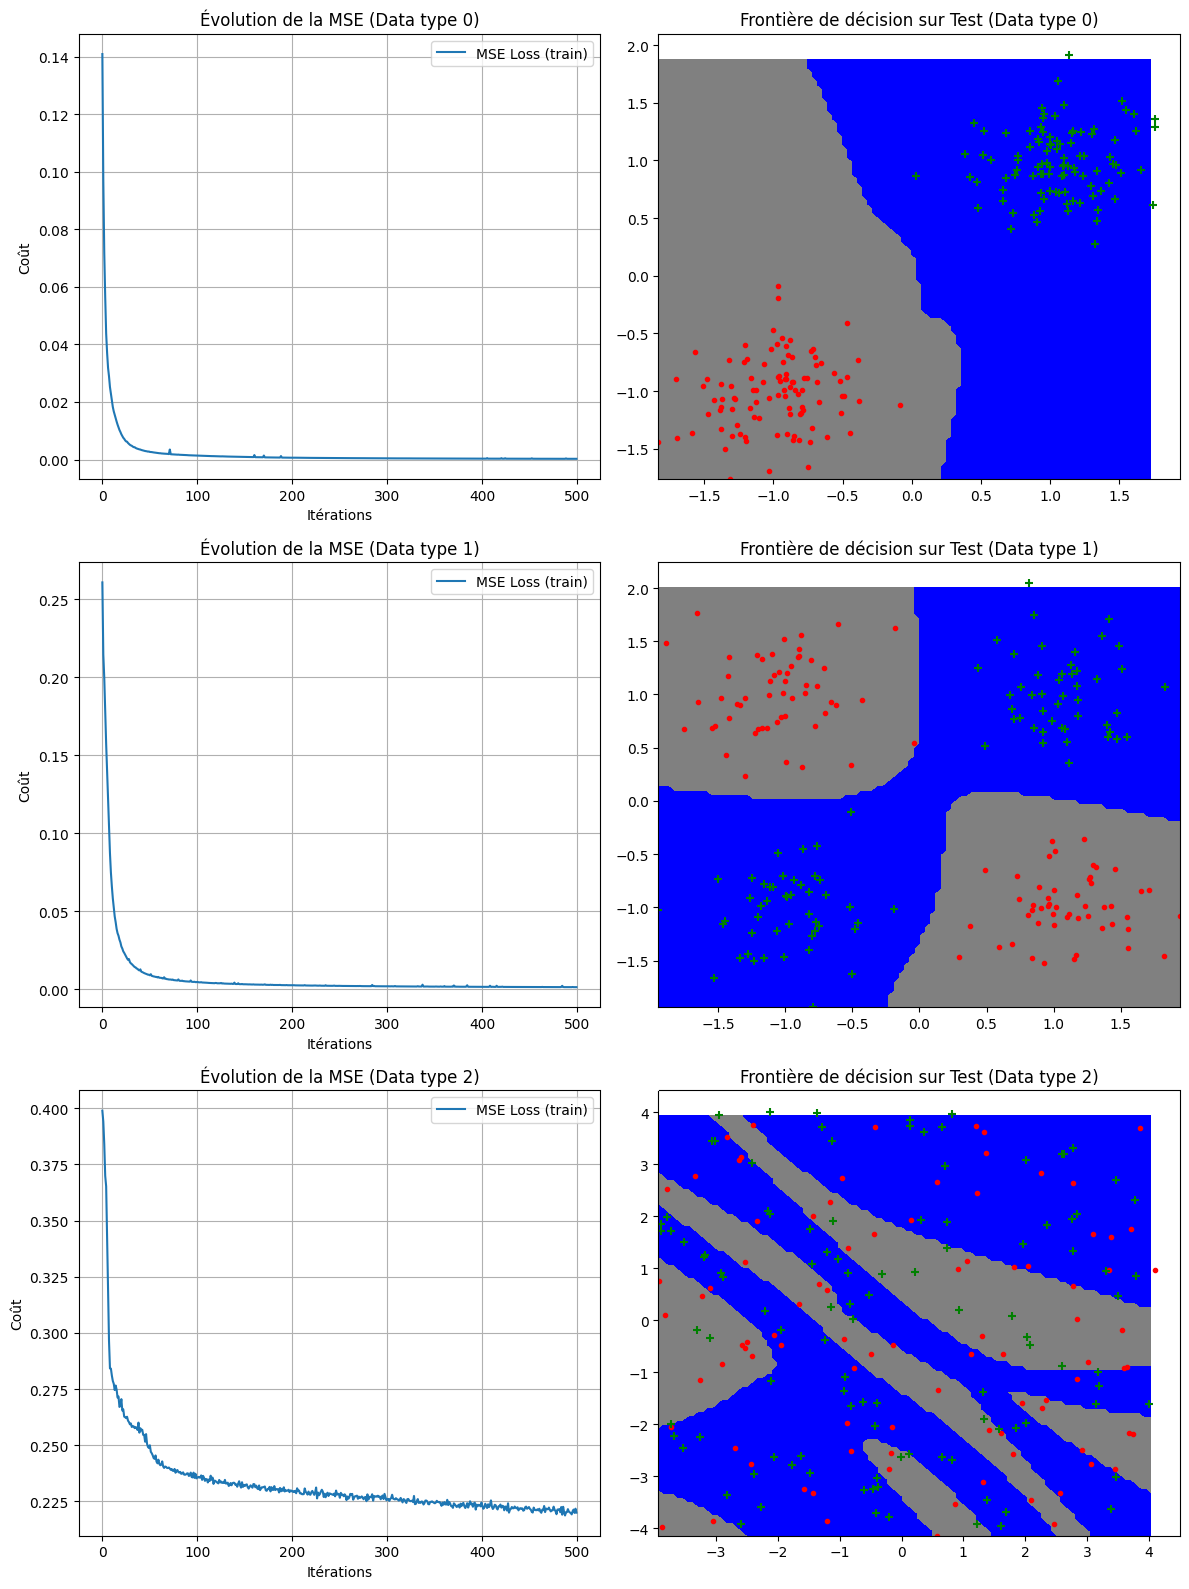

Époque 0, Perte : 0.3445
Époque 50, Perte : 0.0410
Époque 100, Perte : 0.0180
Époque 150, Perte : 0.0120
Époque 200, Perte : 0.0090
Époque 250, Perte : 0.0072
Époque 300, Perte : 0.0060
Époque 350, Perte : 0.0051
Époque 400, Perte : 0.0044
Époque 450, Perte : 0.0038
Test Loss (Data type 0): 0.0029
Époque 0, Perte : 0.3460
Époque 50, Perte : 0.1948
Époque 100, Perte : 0.1646
Époque 150, Perte : 0.1479
Époque 200, Perte : 0.1373
Époque 250, Perte : 0.1299
Époque 300, Perte : 0.1259
Époque 350, Perte : 0.1232
Époque 400, Perte : 0.1220
Époque 450, Perte : 0.1203
Test Loss (Data type 1): 0.1091
Époque 0, Perte : 0.3326
Époque 50, Perte : 0.0186
Époque 100, Perte : 0.0172
Époque 150, Perte : 0.0166
Époque 200, Perte : 0.0161
Époque 250, Perte : 0.0158
Époque 300, Perte : 0.0156
Époque 350, Perte : 0.0155
Époque 400, Perte : 0.0152
Époque 450, Perte : 0.0153
Test Loss (Data type 2): 0.0193


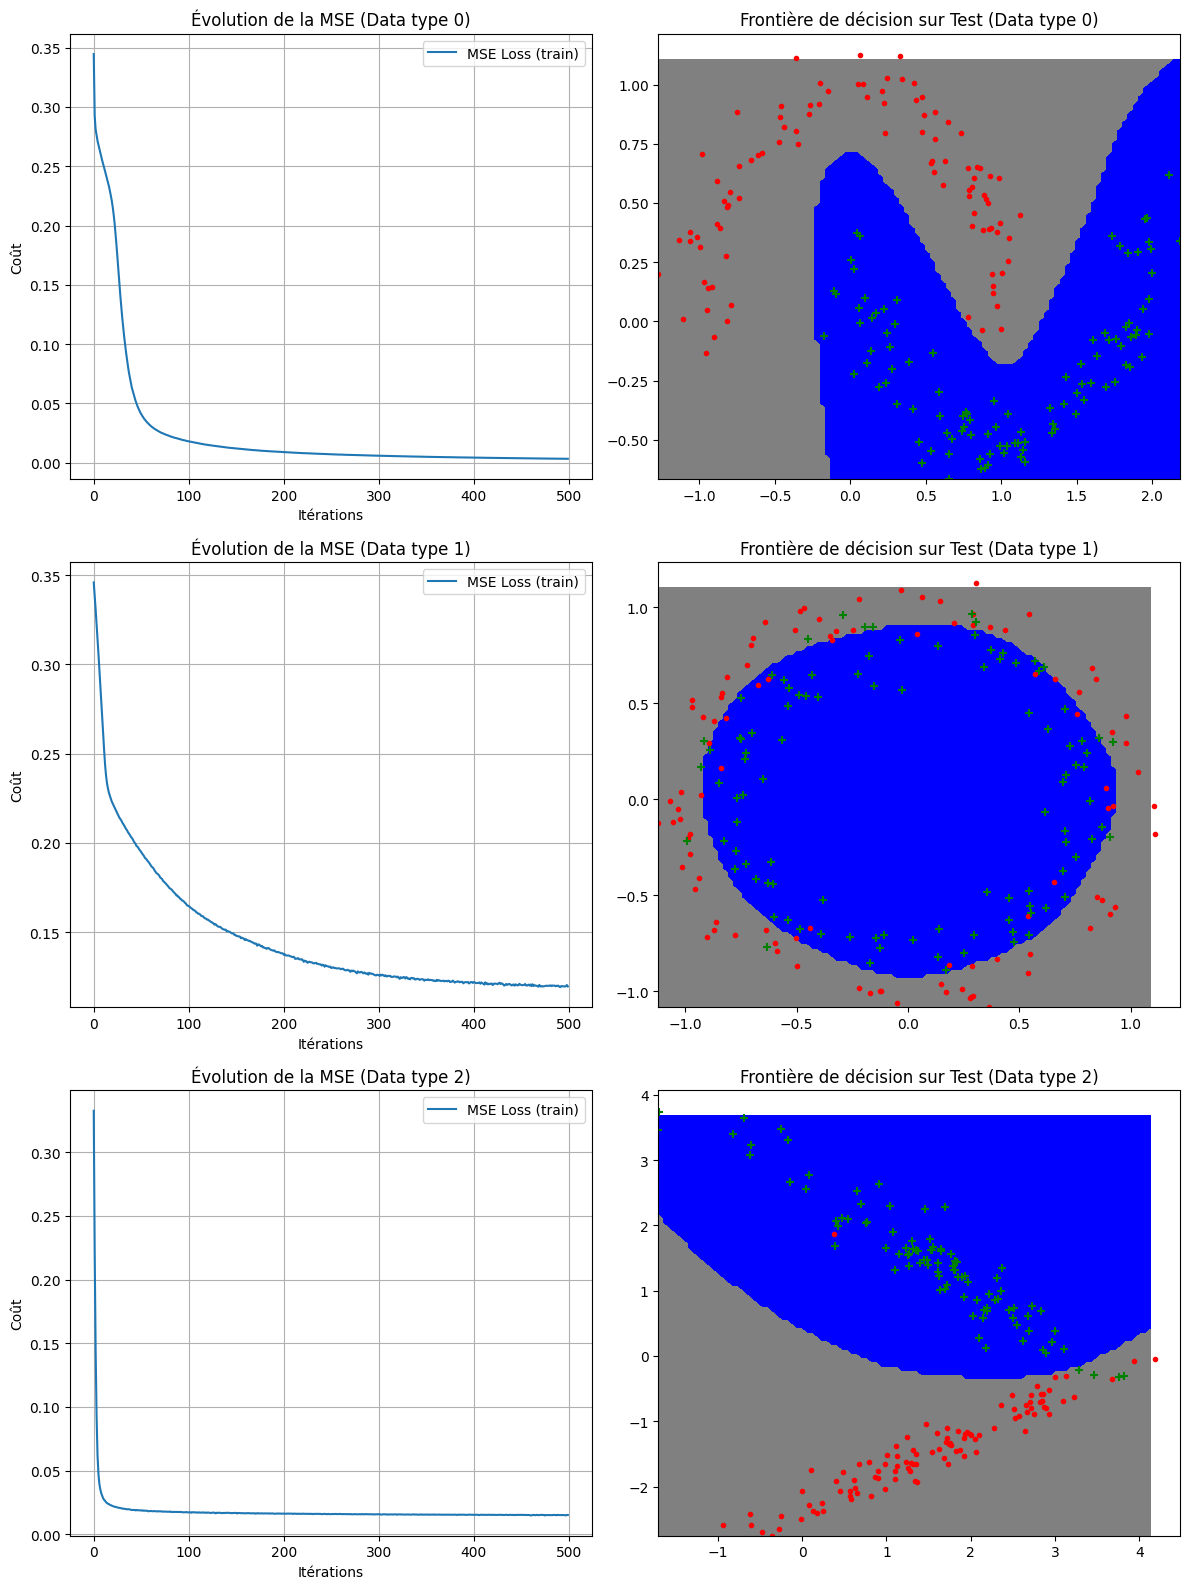

In [4]:
from sklearn.model_selection import train_test_split
import os
output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)
plt.figure(figsize=(12, 16))

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 20),
        TanH(),
        Linear(20, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, datax, datay, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.subplot(3, 2, 2 * i + 1) 
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)  
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


plt.tight_layout()

output_path = os.path.join(output_dir, "optim1.png")
plt.savefig(output_path, dpi=300)

plt.show()
plt.figure(figsize=(12, 16))

for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)


    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 20),
        TanH(),
        Linear(20, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, X_train, y_train, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.subplot(3, 2, 2 * i + 1) 
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)  
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


plt.tight_layout()

output_path = os.path.join(output_dir, "optim2.png")
plt.savefig(output_path, dpi=300)

plt.show()

